In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
import pickle

In [68]:
warnings.filterwarnings('ignore')

In [69]:
df= pd.read_excel("Placement_db.xlsx")

In [70]:
df.head()

,Stud_id,Company,Position,Package,Passing Year,percentage
0,1.0,MNC,Trainee,180000,2020.0,75.0
1,2.0,MNC,Trainee,180000,2021.0,82.0
2,3.0,MNC,Trainee,180000,2022.0,68.0
3,4.0,MNC,Trainee,154000,2023.0,91.0
4,5.0,MNC,Trainee,154000,2024.0,85.0


# Dropping columns not used for analysis

In [71]:
df=df.drop(columns=['Stud_id'], axis=1)

In [72]:
df.head()

,Company,Position,Package,Passing Year,percentage
0,MNC,Trainee,180000,2020.0,75.0
1,MNC,Trainee,180000,2021.0,82.0
2,MNC,Trainee,180000,2022.0,68.0
3,MNC,Trainee,154000,2023.0,91.0
4,MNC,Trainee,154000,2024.0,85.0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       285 non-null    object 
 1   Position      275 non-null    object 
 2   Package       271 non-null    object 
 3   Passing Year  285 non-null    float64
 4   percentage    285 non-null    float64
dtypes: float64(2), object(3)
memory usage: 11.3+ KB


In [74]:
df['Passing Year'] = df['Passing Year'].fillna(0).astype(int)

In [75]:
df['A_I_rating'] = np.random.randint(5, 11, size=len(df))

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       285 non-null    object 
 1   Position      275 non-null    object 
 2   Package       271 non-null    object 
 3   Passing Year  286 non-null    int64  
 4   percentage    285 non-null    float64
 5   A_I_rating    286 non-null    int32  
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 12.4+ KB


In [77]:
df.rename(columns={'Company':'company','Position':'position','Package':'package','Passing Year':'pass_yr','Percentage':'percentage'}, inplace=True)

In [78]:
df.isnull().sum()

company        1
position      11
package       15
pass_yr        0
percentage     1
A_I_rating     0
dtype: int64

In [79]:
list=[df['company'], df['position'], df['package'], df['percentage']]

for li in list:
    li.fillna(li.mode()[0], inplace=True)

In [80]:
df.isnull().sum()

company       0
position      0
package       0
pass_yr       0
percentage    0
A_I_rating    0
dtype: int64

In [81]:
df.duplicated().sum()

np.int64(1)

In [82]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, 0 to 285
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   company     285 non-null    object 
 1   position    285 non-null    object 
 2   package     285 non-null    object 
 3   pass_yr     285 non-null    int64  
 4   percentage  285 non-null    float64
 5   A_I_rating  285 non-null    int32  
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 14.5+ KB


# Value counts of each column

In [84]:
df['company'].value_counts()

company
MNC        158
Startup    127
Name: count, dtype: int64

In [85]:
df['position'].value_counts()

position
Trainee       175
Engineer       26
Analyst        21
Consultant     13
Executive      12
Associate       9
Ext             7
Tester          5
Officer         4
Associate       4
Develo          4
Teacher         2
Suvisor         2
incharge        1
Name: count, dtype: int64

In [86]:
df['position'] = df['position'].replace({
    'Ext': 'Expert',
    'Develo': 'Developer',
    'Suvisor': 'Supervisor',
    'incharge': 'Supervisor',
    'Officer': 'Supervisor',
    'Teacher': 'Expert',
    'Associate ': 'Associate'
})

In [87]:
df['position'].value_counts()

position
Trainee       175
Engineer       26
Analyst        21
Associate      13
Consultant     13
Executive      12
Expert          9
Supervisor      7
Tester          5
Developer       4
Name: count, dtype: int64

In [88]:
df['package'].value_counts()

package
185856      56
152000      36
190926      29
180000      21
275000      18
350000      18
220000      10
192000       9
276000       8
2202000      8
120000       8
154000       8
144000       7
250000       5
96000        5
193158       5
200000       4
320000       4
225000       4
153252       3
300000       3
168000       2
380000       2
325000       2
364000       2
251999       1
2.50,000     1
90000        1
288000       1
333500       1
156000       1
280010       1
391989       1
Name: count, dtype: int64

In [89]:
#remove commas and non numeric characters and change datataype

df['package'] = df['package'].replace('[^0-9]', '', regex=True).astype(int)

In [90]:
df['package'].value_counts()

package
185856     56
152000     36
190926     29
180000     21
350000     18
275000     18
220000     10
192000      9
2202000     8
120000      8
276000      8
154000      8
144000      7
250000      6
96000       5
193158      5
320000      4
200000      4
225000      4
153252      3
300000      3
168000      2
364000      2
380000      2
325000      2
90000       1
251999      1
288000      1
333500      1
156000      1
280010      1
391989      1
Name: count, dtype: int64

In [91]:
df['pass_yr'].value_counts()

pass_yr
2021    38
2022    38
2023    38
2024    38
2020    37
2019    35
2018    27
2017    18
2016    10
2015     4
2014     1
0        1
Name: count, dtype: int64

In [92]:
df['percentage'].value_counts()

percentage
88.0    21
82.0    14
90.0    14
66.0    12
72.0    11
74.0    10
81.0     9
75.0     9
73.0     9
78.0     9
79.0     9
71.0     8
77.0     8
85.0     8
68.0     8
80.0     8
87.0     8
76.0     8
70.0     8
86.0     8
84.0     7
63.0     6
64.0     6
89.0     6
67.0     6
69.0     6
91.0     5
65.0     5
61.0     5
83.0     5
58.0     4
54.0     4
62.0     4
92.0     3
60.0     3
59.0     3
55.0     3
53.0     1
57.0     1
93.0     1
52.0     1
56.0     1
Name: count, dtype: int64

In [93]:
df['A_I_rating'].value_counts()

A_I_rating
8     66
9     52
5     50
6     43
10    41
7     33
Name: count, dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, 0 to 285
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   company     285 non-null    object 
 1   position    285 non-null    object 
 2   package     285 non-null    int64  
 3   pass_yr     285 non-null    int64  
 4   percentage  285 non-null    float64
 5   A_I_rating  285 non-null    int32  
dtypes: float64(1), int32(1), int64(2), object(2)
memory usage: 14.5+ KB


# Data Visualization

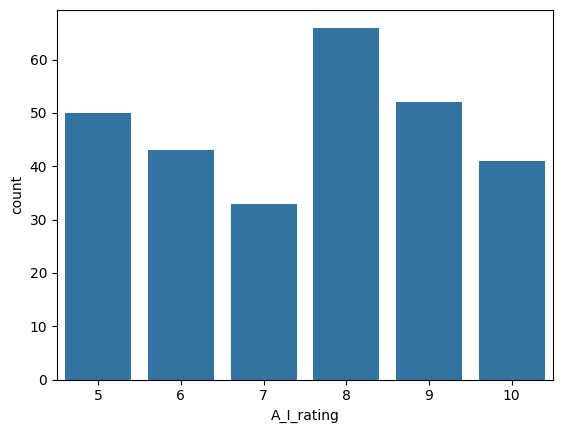

In [95]:
# count plot
sns.countplot(x='A_I_rating', data=df)
plt.show()

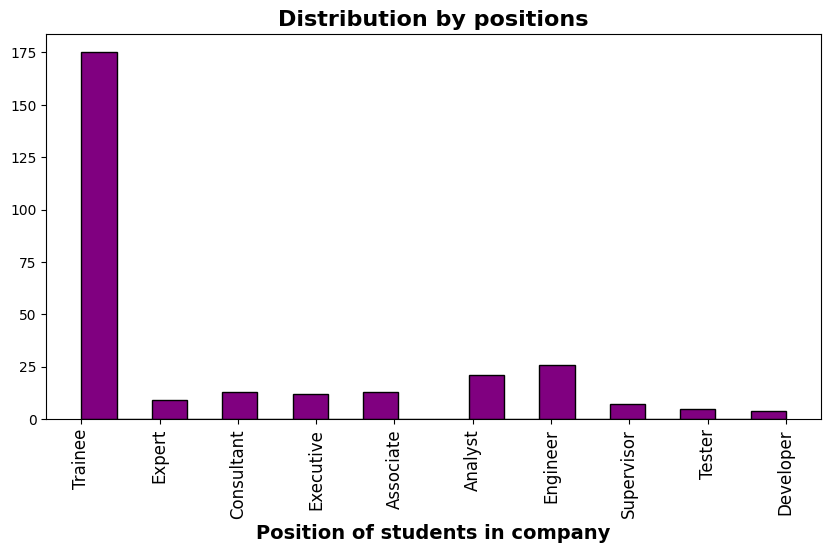

In [96]:
#Histogram

plt.figure(figsize=(10,5))
plt.hist(df['position'],bins=20, color='purple', edgecolor ='black')
plt.xlabel('Position of students in company', fontsize=14, fontweight='bold')
plt.title('Distribution by positions', fontsize=16, fontweight='bold')
plt.xticks(rotation=40, fontsize=12, color='black')
plt.xticks(rotation=90)
plt.show()

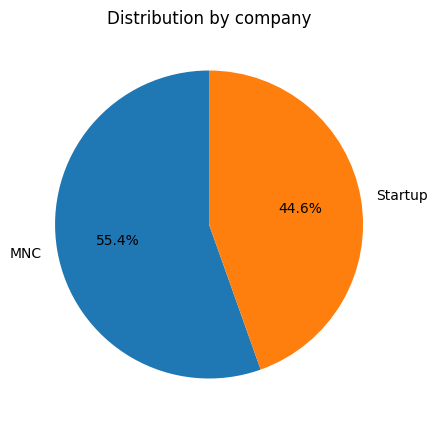

In [97]:
# Pie chart
com_counts = df['company'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(com_counts, labels=com_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution by company')
plt.show()

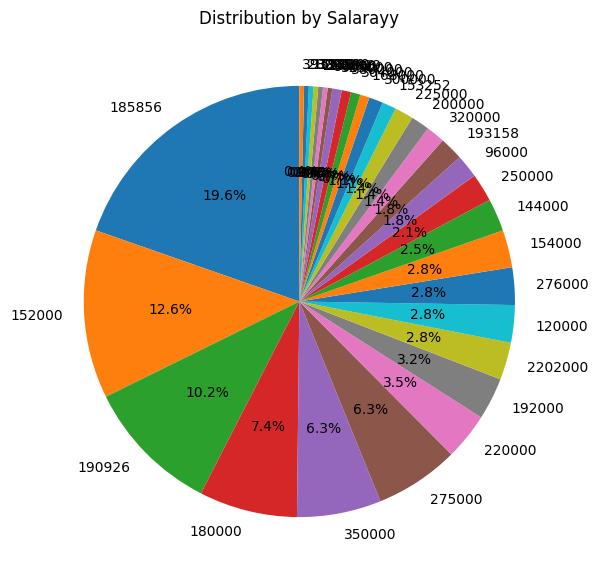

In [98]:
com_counts = df['package'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(com_counts, labels=com_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution by Salarayy')
plt.show()

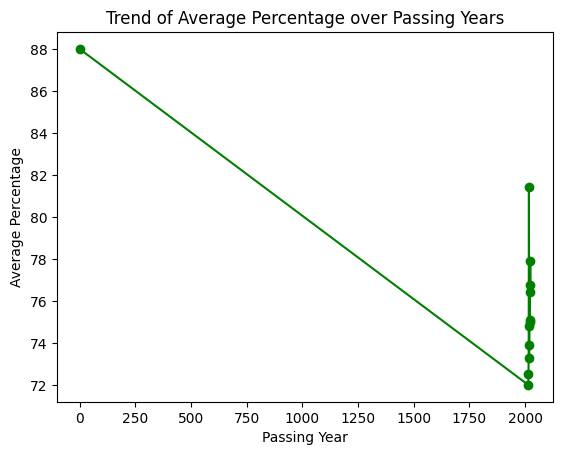

In [99]:
avg_percentage_per_year = df.groupby('pass_yr')['percentage'].mean()
avg_percentage_per_year.plot(kind='line', marker='o', color='green')

plt.title('Trend of Average Percentage over Passing Years')
plt.xlabel('Passing Year')
plt.ylabel('Average Percentage')
plt.show()

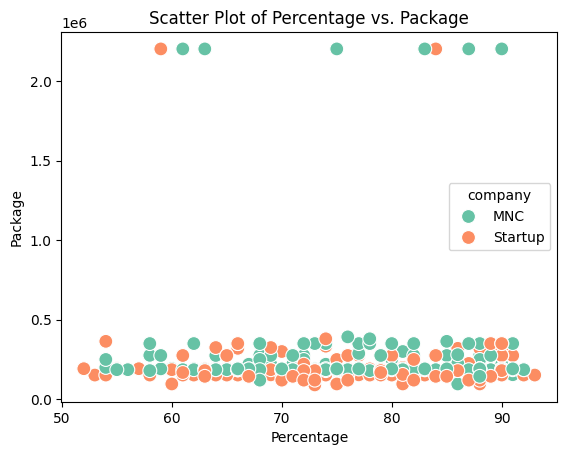

In [100]:
sns.scatterplot(x='percentage', y='package', hue='company', data=df, palette='Set2', s=100)
plt.title('Scatter Plot of Percentage vs. Package')
plt.xlabel('Percentage')
plt.ylabel('Package')
plt.show()

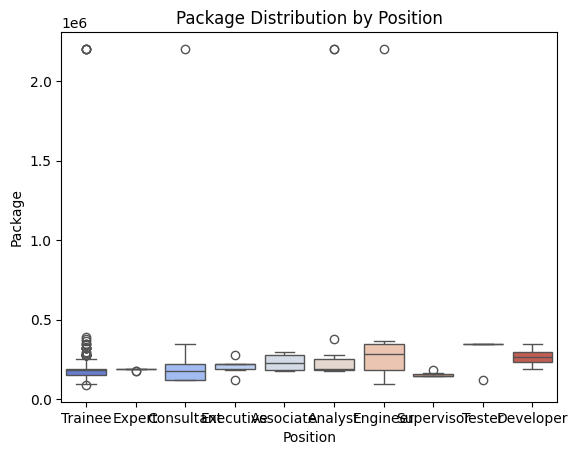

In [101]:
sns.boxplot(x='position', y='package', data=df, palette='coolwarm')
plt.title('Package Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Package')
plt.show()


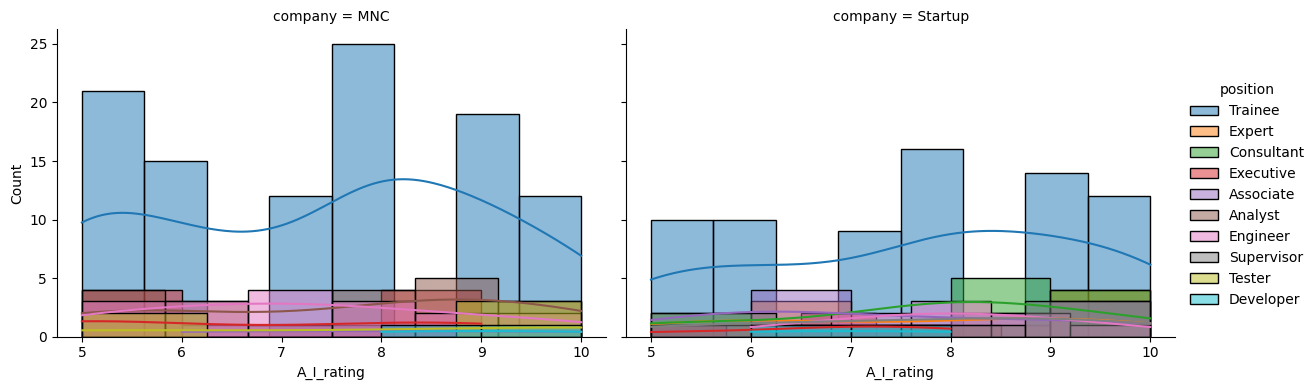

In [102]:
g = sns.FacetGrid(df, col='company', hue='position', col_wrap=2, height=4, aspect=1.5)
g.map(sns.histplot, 'A_I_rating', kde=True).add_legend()
plt.show()

# EDA 

In [103]:
import sweetviz as sz

In [104]:
#report = sz.analyze(df)
#report.show_html('report.html')

# Label encoding

In [105]:
df['company'].unique()

array(['MNC', 'Startup'], dtype=object)

In [106]:
df.replace({'company':{'MNC':0, 'Startup':1}}, inplace=True)

In [107]:
df['company'].unique()

array([0, 1])

In [108]:
df['position'].unique()

array(['Trainee', 'Expert', 'Consultant', 'Executive', 'Associate',
       'Analyst', 'Engineer', 'Supervisor', 'Tester', 'Developer'],
      dtype=object)

In [109]:
df.replace({'position':{'Trainee':0, 'Associate':1, 'Consultant':2, 'Analyst':3, 'Engineer':4, 'Tester':5, 'Developer':6, 'Executive':7, 'Supervisor':8, 'Expert':9}}, inplace=True)

In [110]:
df['position'].unique()

array([0, 9, 2, 7, 1, 3, 4, 8, 5, 6])

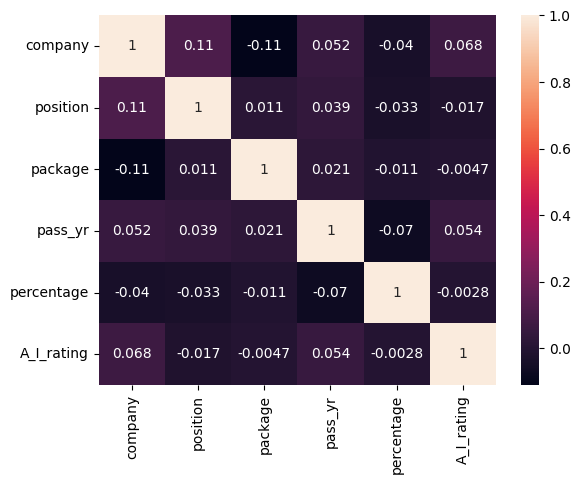

In [111]:
#heatmap
sns.heatmap(df.corr(), annot =True)
plt.show()

array([[<Axes: title={'center': 'company'}>,
        <Axes: title={'center': 'position'}>],
       [<Axes: title={'center': 'package'}>,
        <Axes: title={'center': 'pass_yr'}>],
       [<Axes: title={'center': 'percentage'}>,
        <Axes: title={'center': 'A_I_rating'}>]], dtype=object)

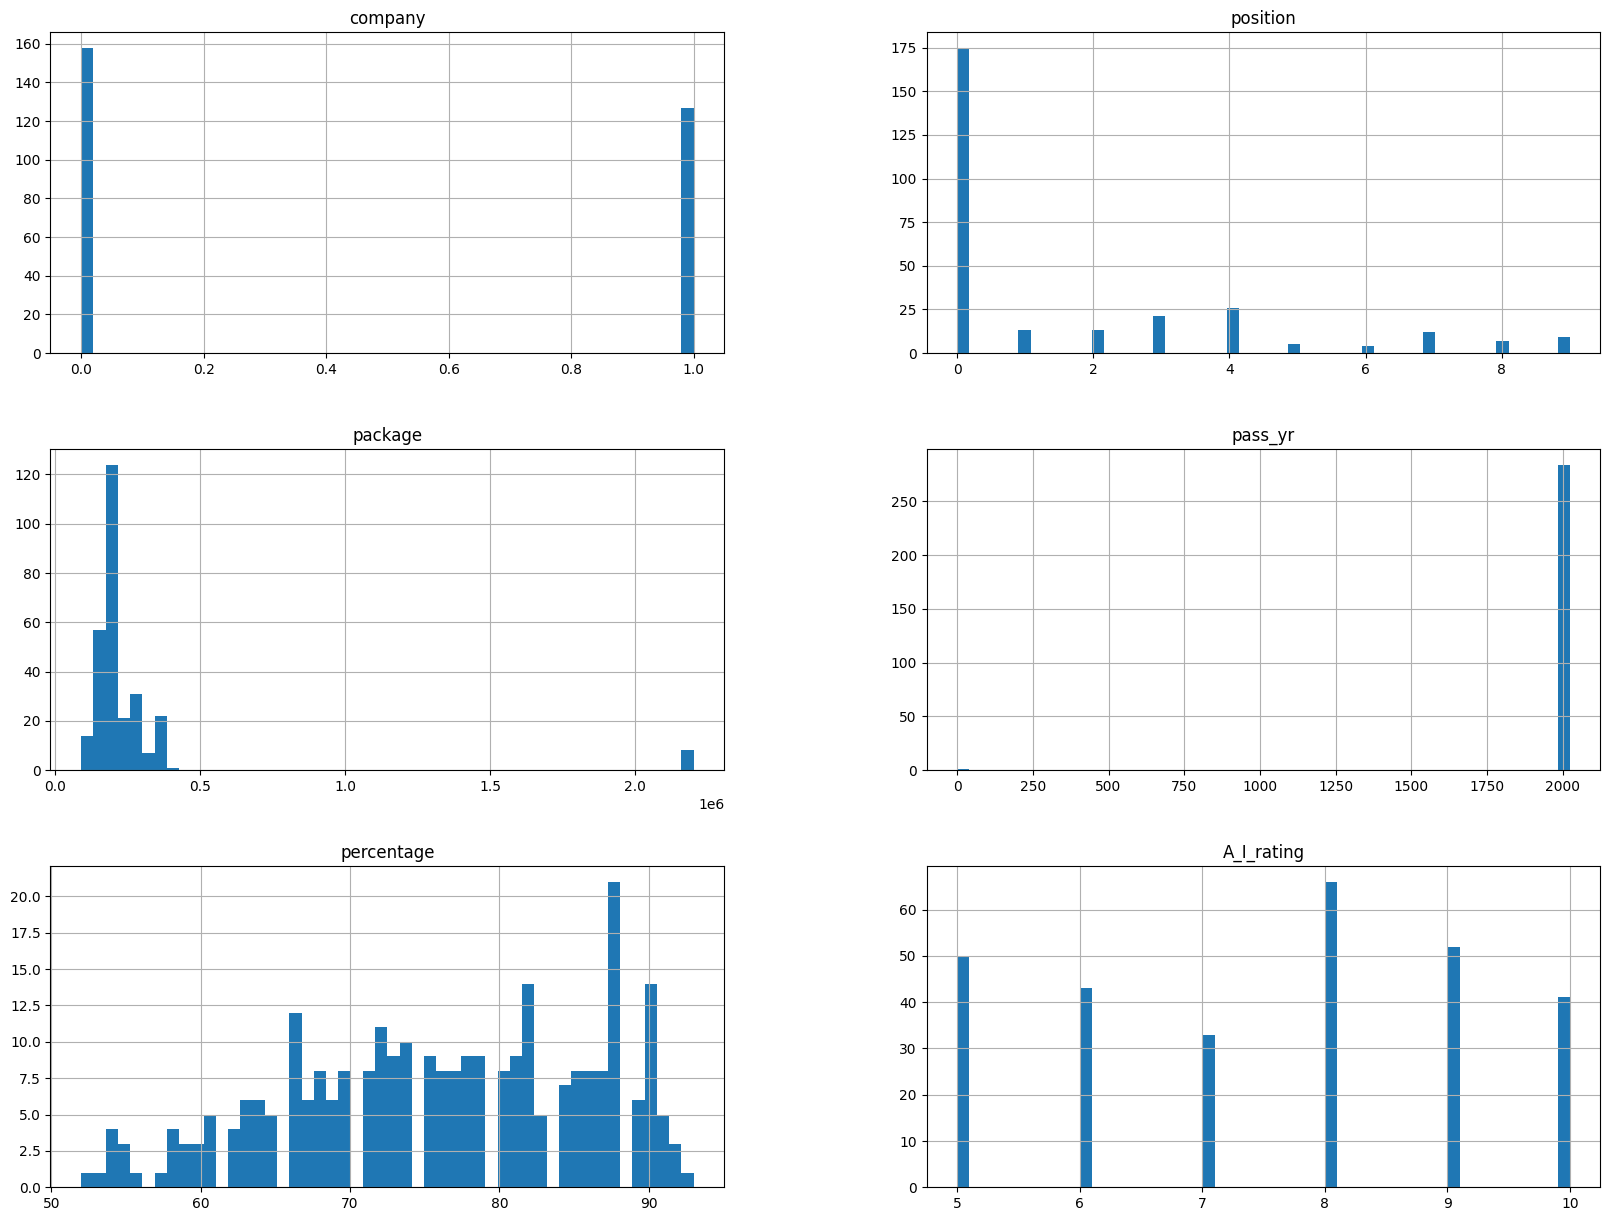

In [112]:
df.hist(bins=50, figsize=(20,15))

# Implementing algorithms

In [113]:
x = df.drop(columns=['package'], axis = 1)
y = df['package']

In [142]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size=0.2,random_state=2)

In [143]:
x_train.shape, x_test.shape, y_train.shape , y_test.shape

((228, 5), (57, 5), (228,), (57,))

In [144]:
print(x_train.std())

company         0.497831
position        2.543246
pass_yr       133.847257
percentage     10.100970
A_I_rating      1.669194
dtype: float64


In [145]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [146]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(x_train, y_train)

LinearRegression()

In [147]:
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

y_pred2 = model2.predict(x_test)
mse2 = mean_squared_error(y_test, y_pred2)
r22 = r2_score(y_test, y_pred2)
print(f"Mean Squared Error: {mse2:.2f}")
print(f"R-squared Score: {r22:.2f}")

Mean Squared Error: 216736638420.78
R-squared Score: -0.07


## Random forest

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model5 = RandomForestClassifier(n_estimators=100, random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model5, param_grid, cv=5)
grid_search.fit(x_train, y_train)

print(f"Random Forest Best Params: {grid_search.best_params_}")

model5.fit(x_train, y_train)

y_pred5 = model5.predict(x_test)

# Evaluate the model
acc5 = accuracy_score(y_test, y_pred5)
print(f"Accuracy: {acc5:.2f}")


X_train_pred = model5.predict(x_train)
training_acc = accuracy_score(X_train_pred, y_train)
print("Training data accuracy : ", training_acc)

Random Forest Best Params: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.23
Training data accuracy :  0.9912280701754386


In [149]:
inp = [0	,0	,2020	,75.0	,7]

#changing the input as numpy array
inp_np_array = np.asarray(inp)

#reshape data as we are predicting for one instance only
inp_reshape = inp_np_array.reshape(1,-1)

predict_lin_reg = model2.predict(inp_reshape)
print("Prediction using Linear regression : ",predict_lin_reg)

predict_ran_for = model5.predict(inp_reshape)
print("Prediction using Random Forest : ",predict_ran_for)

Prediction using Linear regression :  [303432.8102307]
Prediction using Random Forest :  [180000]


In [129]:
df.head()

,company,position,package,pass_yr,percentage,A_I_rating
0,0,0,180000,2020,75.0,7
1,0,0,180000,2021,82.0,7
2,0,0,180000,2022,68.0,5
3,0,0,154000,2023,91.0,6
4,0,0,154000,2024,85.0,10


In [130]:
df.columns

Index(['company', 'position', 'package', 'pass_yr', 'percentage',
       'A_I_rating'],
      dtype='object')

In [151]:
with open('place.pkl', 'wb') as f:
    pickle.dump(model5, f)

In [152]:
import sklearn
print(sklearn.__version__)


1.5.2
